#<center> A deep dive into </center>

<br><br>
**Repo: **https://github.com/pickle-weasel/Aztecs---Project-1<br>
**Sources:**https://saferparksdata.org/data-sources<br>
Limitations: https://saferparksdata.org/data-sources/limitations-saferparks-accident-data





In [17]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time

from pprint import pprint

# <center>**Read & add new features to Cleaned Dataset**</center>


---



In [2]:
csv_file = 'Cleaned_Saferparks.csv'
clean_data = pd.read_csv(csv_file, sep = '\t', index_col = None)
# clean_data.columns

### +Features

In [3]:
#+Feature Age
age_labels = ['12 and under', '12-20','21-29', '30-39', '40-49', '50-69', '70 and older']
bins = [0, 12, 21, 30, 40, 50, 70, 111]

clean_data['Age Groups'] = pd.cut(clean_data['Age'], bins, labels=age_labels)

#+Feature Year, Month, and Week Features extracted from Date
clean_data["Year"] = clean_data["Date"].map(lambda x: x.split("-")[2])
clean_data['Month'] =  [x.split('-')[1] for x in clean_data.loc[:,'Date']]
clean_data['Day'] =  [int(x.split('-')[0]) for x in clean_data.loc[:,'Date']]
clean_data['Week'] = [1+int(x)//7 for x in clean_data.loc[:,'Day']]

In [4]:
#Year with most injuries
year_most_injuries = clean_data.loc[clean_data["Year"] == "2001"]

# Bar Plots
___

## Year with most injuries


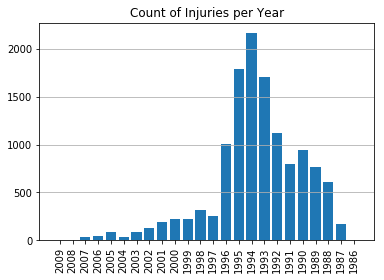

In [5]:
count = clean_data.groupby("Year")["Injury"].count()
years = clean_data["Year"].unique()
figure1 = plt.bar(years, count)
plt.title("Count of Injuries per Year")
plt.xticks(years, rotation = 'vertical')
plt.grid(axis  = 'y')
plt.show()

In [6]:
#Year with most injuries
year_most_injuries = clean_data.loc[clean_data["Year"] == "2001"]

count_cat_yr01=year_most_injuries["Category"].value_counts()#.sort()

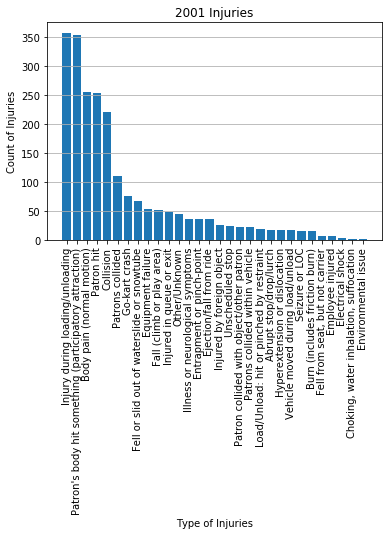

In [7]:
# sorted function only works on local notebook  **CHECKED
figure2= plt.bar(count_cat_yr01.index, count_cat_yr01)
plt.xticks(count_cat_yr01.index, rotation='vertical')
plt.title("2001 Injuries")
plt.xlabel("Type of Injuries")
plt.ylabel("Count of Injuries")
plt.grid(axis  = 'y')
plt.show()


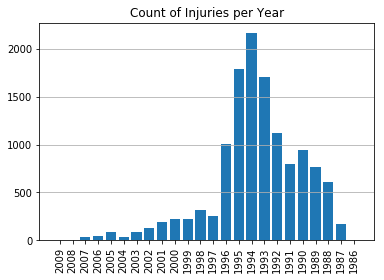

In [8]:
count = clean_data.groupby("Year")["Injury"].count()
years = clean_data["Year"].unique()
figure1 = plt.bar(years, count)
plt.title("Count of Injuries per Year")
plt.xticks(years, rotation = 'vertical')
plt.grid(axis  = 'y')
plt.show()

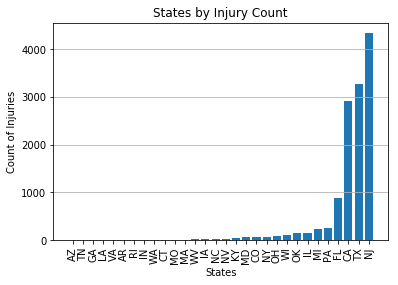

In [9]:
frame = pd.DataFrame({'Injury Count' : clean_data.groupby("State")["Injury"].count()})
frame = frame.sort_values(by = ['Injury Count'])

plt.bar(frame.index, frame['Injury Count'])
plt.xticks(frame.index, rotation='vertical')
plt.title("States by Injury Count")
plt.xlabel("States")
plt.ylabel("Count of Injuries")
plt.grid(axis  = 'y')
plt.show()

In [10]:
clean_grouped = clean_data.copy()
clean_grouped = clean_grouped.dropna(how='any')

clean_grouped = clean_grouped.groupby(['Age', 'State']).count()
clean_grouped = clean_grouped.reset_index()

cali = clean_grouped.loc[clean_grouped['State'] == 'CA']
cali = cali.set_index('Age')

florida = clean_grouped.loc[clean_grouped['State'] == 'FL']
florida = florida.set_index('Age')

texas = clean_grouped.loc[clean_grouped['State'] == 'TX']
texas = texas.set_index('Age')

jersey = clean_grouped.loc[clean_grouped['State'] == 'NJ']
jersey = jersey.set_index('Age')



line = clean_data.copy()
line = line.dropna(how='any')

line = line.groupby(['Year', 'State']).count()
line = line.reset_index()

cali_line = line.loc[line['State'] == 'CA']
cali_line = cali_line.set_index('Year')

florida_line = line.loc[line['State'] == 'FL']
florida_line = florida_line.set_index('Year')

texas_line = line.loc[line['State'] == 'TX']
texas_line = texas_line.set_index('Year')

jersey_line = line.loc[line['State'] == 'NJ']
jersey_line = jersey_line.set_index('Year')

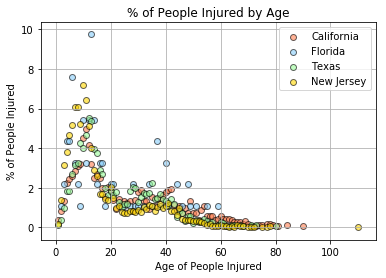

In [11]:
total_cali = cali['ID'].sum()
total_florida = florida['ID'].sum()
total_texas = texas['ID'].sum()
total_jersey = jersey['ID'].sum()



cali_accident_pct = 100 * (cali['ID'] / total_cali)
florida_accident_pct = 100 * (florida['ID'] / total_florida)
texas_accident_pct = 100 * (texas['ID'] / total_texas)
jersey_accident_pct = 100 * (jersey['ID'] / total_jersey)

colors = ['coral', 'lightskyblue', 'palegreen', 'gold']

plt.scatter(cali_accident_pct.index, cali_accident_pct.values, linewidths=1, c=colors[0], edgecolor='black', alpha=0.6, label='California')
plt.scatter(florida_accident_pct.index, florida_accident_pct.values, linewidths=1, c=colors[1], edgecolor='black', alpha=0.6, label='Florida')
plt.scatter(texas_accident_pct.index, texas_accident_pct.values, c=colors[2], edgecolor='black', alpha=0.6, label='Texas')
plt.scatter(jersey_accident_pct.index, jersey_accident_pct.values, linewidths=1, c=colors[3], edgecolor='black', alpha=0.6, label='New Jersey')

plt.title('% of People Injured by Age')
plt.xlabel('Age of People Injured')
plt.ylabel('% of People Injured')

plt.grid(True)

plt.legend()

plt.show()

Age

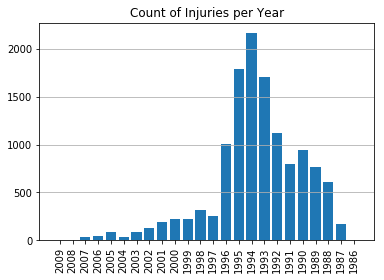

In [12]:
count = clean_data.groupby("Year")["Injury"].count()
years = clean_data["Year"].unique()
figure1 = plt.bar(years, count)
plt.title("Count of Injuries per Year")
plt.xticks(years, rotation = 'vertical')
plt.grid(axis  = 'y')
plt.show()

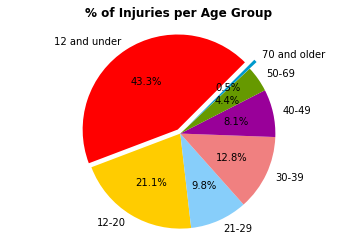

In [13]:
total_count = clean_data.groupby("Age Groups")["Injury"].count().sum()
age_count=clean_data.groupby("Age Groups")["Injury"].count()/total_count
colors = ['#ff0000', '#ffcc00', 'lightskyblue', 'lightcoral',\
         '#990099','#669900','#0099cc']

explode=[0.05, 0, 0, 0, 0, 0, 0.1]

figure4=plt.pie(age_count, labels=age_labels, explode=explode,\
                colors = colors, autopct="%.1f%%", startangle=45)
plt.title("% of Injuries per Age Group", fontweight="bold")
plt.axis("equal")


# Show Figure
plt.show()

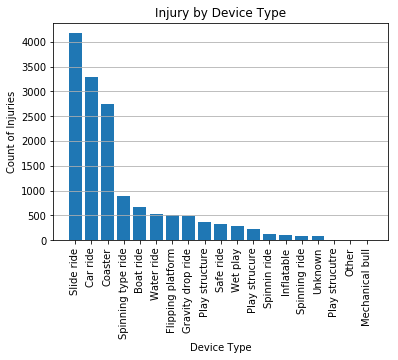

In [14]:
device_count=clean_data["Device type"].value_counts()

figure6=plt.bar(device_count.index, device_count)
plt.xticks(device_count.index, rotation='vertical')
plt.title("Injury by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Count of Injuries")
plt.grid(axis  = 'y')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

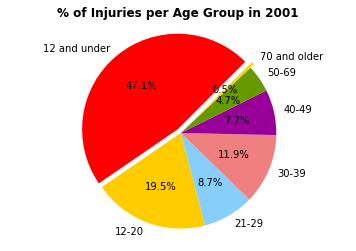

In [15]:
age_in_01 = year_most_injuries.groupby("Age Groups")["Injury"].count().sum()
age_01_count = year_most_injuries.groupby("Age Groups")["Injury"].count()/age_in_01

explode=[0.05, 0, 0, 0, 0, 0, 0.05]
colors = ['#ff0000', '#ffcc00', 'lightskyblue', 'lightcoral',\
         '#990099','#669900','gold']

figure5=plt.pie(age_01_count, labels=age_labels, explode=explode, colors=colors, autopct="%.1f%%", startangle=45) 
plt.title("% of Injuries per Age Group in 2001", fontweight="bold")
plt.axis("equal")
plt.show

[Text(0,0,'2009'),
 Text(0,0,'2008'),
 Text(0,0,'2007'),
 Text(0,0,'2006'),
 Text(0,0,'2005'),
 Text(0,0,'2004'),
 Text(0,0,'2003'),
 Text(0,0,'2002'),
 Text(0,0,'2001'),
 Text(0,0,'2000'),
 Text(0,0,'1999'),
 Text(0,0,'1998'),
 Text(0,0,'1997'),
 Text(0,0,'1996'),
 Text(0,0,'1995'),
 Text(0,0,'1994'),
 Text(0,0,'1993'),
 Text(0,0,'1992'),
 Text(0,0,'1991'),
 Text(0,0,'1990'),
 Text(0,0,'1989'),
 Text(0,0,'1988')]

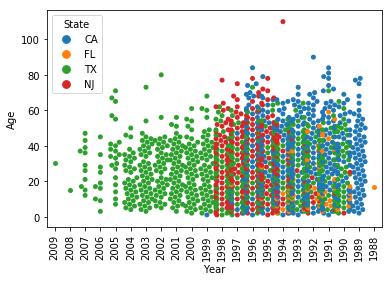

In [18]:
cd_sorted = clean_data.sort_values(by=['Year'], ascending=True)
cd_sorted.head()

cd_sorted = cd_sorted.dropna(how='any')
cd_sorted.head()

test = cd_sorted.groupby(['Year', 'State', 'Age']).count()
test = test.reset_index()

year_ca = test.loc[test['State'] == 'CA']

year_fl = test.loc[test['State'] == 'FL']

year_tx = test.loc[test['State'] == 'TX']

year_nj = test.loc[test['State'] == 'NJ']

df = [year_ca, year_fl, year_tx, year_nj]
frames = pd.concat(df)

ax = sns.swarmplot(x = 'Year', y = 'Age', data = frames, hue = 'State')
ax.set_xticklabels(labels = years.astype(int),rotation= 90)

[Text(0,0,'2000'),
 Text(0,0,'2001'),
 Text(0,0,'2002'),
 Text(0,0,'2003'),
 Text(0,0,'2004'),
 Text(0,0,'2005'),
 Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009')]

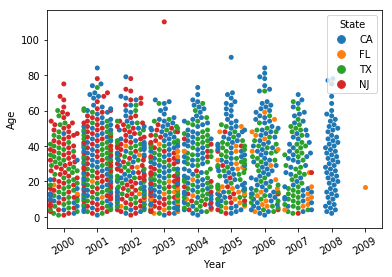

In [19]:
frames = frames.loc[frames['Year'] > '1999']
ax = sns.swarmplot(x = 'Year', y = 'Age', data = frames, hue = 'State')
ax.set_xticklabels(labels = frames['Year'].unique(),rotation=30)
